In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
import os
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
IMG_HEIGHT=48
IMG_WIDTH = 48
batch_size=32

In [ ]:
train_data_dir='/content/train'
validation_data_dir='/content/test'

In [ ]:
train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(IMG_HEIGHT, IMG_WIDTH),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True)

Found 28709 images belonging to 7 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(IMG_HEIGHT, IMG_WIDTH),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)

Found 7178 images belonging to 7 classes.


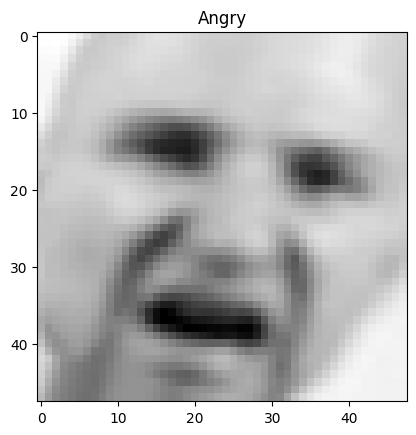

In [ ]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

img, label = train_generator.__next__()

import random

i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 conv2d_14 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 22, 22, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 10, 10, 128)       0         
 ng2D)                                                

In [ ]:
train_path = "/content/train"
test_path = "/content/test"

num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)


epochs=50


In [ ]:
history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//batch_size,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//batch_size)

model.save('emotion_detection_model_50epochs.h5')

Epoch 1/50
897/897 [==============================] - 23s 23ms/step - loss: 1.7833 - accuracy: 0.2618 - val_loss: 1.7094 - val_accuracy: 0.3011
Epoch 2/50
897/897 [==============================] - 21s 24ms/step - loss: 1.6775 - accuracy: 0.3302 - val_loss: 1.5005 - val_accuracy: 0.4287
Epoch 3/50
897/897 [==============================] - 21s 24ms/step - loss: 1.5487 - accuracy: 0.3964 - val_loss: 1.3718 - val_accuracy: 0.4718
Epoch 4/50
897/897 [==============================] - 21s 23ms/step - loss: 1.4495 - accuracy: 0.4389 - val_loss: 1.3016 - val_accuracy: 0.5043
Epoch 5/50
897/897 [==============================] - 21s 23ms/step - loss: 1.3825 - accuracy: 0.4634 - val_loss: 1.2466 - val_accuracy: 0.5219
Epoch 6/50
897/897 [==============================] - 21s 24ms/step - loss: 1.3456 - accuracy: 0.4854 - val_loss: 1.2061 - val_accuracy: 0.5353
Epoch 7/50
897/897 [==============================] - 21s 23ms/step - loss: 1.3155 - accuracy: 0.4958 - val_loss: 1.1854 - val_accuracy:

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [ ]:
from keras.models import load_model


my_model = load_model('emotion_detection_model_50epochs.h5', compile=False)

test_img, test_lbl = validation_generator.__next__()
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions)

import seaborn as sns
sns.heatmap(cm, annot=True)

class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()

In [ ]:
!unzip '/content/UTKFace.zip'

Streaming output truncated to the last 5000 lines.
  inflating: UTKFace/53_0_1_20170116191725055.jpg.chip.jpg  
  inflating: UTKFace/53_0_1_20170116192938845.jpg.chip.jpg  
  inflating: UTKFace/53_0_1_20170117181950281.jpg.chip.jpg  
  inflating: UTKFace/53_0_1_20170120222553113.jpg.chip.jpg  
  inflating: UTKFace/53_0_1_20170120222956787.jpg.chip.jpg  
  inflating: UTKFace/53_0_1_20170120223004304.jpg.chip.jpg  
  inflating: UTKFace/53_0_2_20170104210010763.jpg.chip.jpg  
  inflating: UTKFace/53_0_2_20170112215433623.jpg.chip.jpg  
  inflating: UTKFace/53_0_2_20170112221930338.jpg.chip.jpg  
  inflating: UTKFace/53_0_2_20170116192925824.jpg.chip.jpg  
  inflating: UTKFace/53_0_2_20170116192934154.jpg.chip.jpg  
  inflating: UTKFace/53_0_2_20170119205816456.jpg.chip.jpg  
  inflating: UTKFace/53_0_3_20170104220848558.jpg.chip.jpg  
  inflating: UTKFace/53_0_3_20170109132854337.jpg.chip.jpg  
  inflating: UTKFace/53_0_3_20170109142546975.jpg.chip.jpg  
  inflating: UTKFace/53_0_3_201701

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [ ]:
import os
import cv2
import numpy as np

path = "/content/UTKFace"
images = []
age = []
gender = []
for img in os.listdir(path):
    ages = img.split("_")[0]
    genders = img.split("_")[1]
    img = cv2.imread(os.path.join(path, img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(np.array(img))
    age.append(np.array(ages))
    gender.append(np.array(genders))

age = np.array(age, dtype=np.int64)

age_categories = []
for a in age:
    age_category = min(int(a) // 10, 9)
    age_categories.append(age_category)

age_categories = np.array(age_categories)
images = np.array(images)
gender = np.array(gender, np.uint64)

In [ ]:
age_categories

array([3, 2, 2, ..., 5, 3, 1])

In [ ]:
x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(images, age_categories, test_size=0.15, random_state=42)

x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(images, gender,test_size=0.15, random_state=42)

In [ ]:
print("Shape of x_train_age:", x_train_age.shape)
print("Shape of y_train_age:", y_train_age.shape)
print("Shape of x_test_age:", x_test_age.shape)
print("Shape of y_test_age:", y_test_age.shape)

Shape of x_train_age: (20151, 200, 200, 3)
Shape of y_train_age: (20151,)
Shape of x_test_age: (3557, 200, 200, 3)
Shape of y_test_age: (3557,)


In [ ]:
age_model = Sequential()
age_model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(200,200,3)))

age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(128, kernel_size=3, activation='relu'))

age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(256, kernel_size=3, activation='relu'))

age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(512, kernel_size=3, activation='relu'))

age_model.add(MaxPool2D(pool_size=3, strides=2))
age_model.add(Dropout(0.2))
age_model.add(Flatten())

age_model.add(Dense(256, activation='relu'))
age_model.add(Dense(512, activation='relu'))
age_model.add(Dense(1024, activation='relu'))
age_model.add(Dense(2048, activation='relu'))

age_model.add(Dense(10, activation='linear', name='age'))

age_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print(age_model.summary())

history_age = age_model.fit(x_train_age, y_train_age,validation_data=(x_test_age, y_test_age), epochs=50)

age_model.save('age_categories_model_50epochs_2048.h5')


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 98, 98, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 96, 96, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 47, 47, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 45, 45, 256)       295168    
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 22, 22, 256)      

In [ ]:
age_model.save('age_categories_model_50epochs_2048_.h5')

In [ ]:
gender_model = Sequential()

gender_model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(200,200,3)))

gender_model.add(MaxPool2D(pool_size=3, strides=2))
gender_model.add(Conv2D(64, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(128, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(256, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(512, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Flatten())
gender_model.add(Dropout(0.2))
gender_model.add(Dense(512, activation='relu'))
gender_model.add(Dense(1, activation='sigmoid', name='gender'))

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_gender = gender_model.fit(x_train_gender, y_train_gender,
                        validation_data=(x_test_gender, y_test_gender), epochs=50)

gender_model.save('gender_model_50epochs.h5')

In [ ]:
history = history_age

#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
acc = history.history['accuracy']
#acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

acc = history.history['accuracy']
#acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from keras.models import load_model
#Test the model
my_model = load_model('gender_model_50epochs.h5', compile=False)


predictions = my_model.predict(x_test_gender)
y_pred = (predictions>= 0.5).astype(int)[:,0]

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test_gender, y_pred))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test_gender, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

In [ ]:
#from tensorflow.keras.models import load_model
#from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
face_classifier=cv2.CascadeClassifier('haarcascades_models/haarcascade_frontalface_default.xml')
emotion_model = load_model('/content/emotion_detection_model_100epochs.h5')
age_model = load_model('/content/age_model_50epochs.h5')
gender_model = load_model('/content/gender_model_50epochs.h5')

class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']
gender_labels = ['Male', 'Female']

cap=cv2.VideoCapture(0)

while True:
    ret,frame=cap.read()
    labels=[]

    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=face_classifier.detectMultiScale(gray,1.3,5)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray=gray[y:y+h,x:x+w]
        roi_gray=cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

        #Get image ready for prediction
        roi=roi_gray.astype('float')/255.0  #Scale
        roi=img_to_array(roi)
        roi=np.expand_dims(roi,axis=0)  #Expand dims to get it ready for prediction (1, 48, 48, 1)

        preds=emotion_model.predict(roi)[0]  #Yields one hot encoded result for 7 classes
        label=class_labels[preds.argmax()]  #Find the label
        label_position=(x,y)
        cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)

        #Gender
        roi_color=frame[y:y+h,x:x+w]
        roi_color=cv2.resize(roi_color,(200,200),interpolation=cv2.INTER_AREA)
        gender_predict = gender_model.predict(np.array(roi_color).reshape(-1,200,200,3))
        gender_predict = (gender_predict>= 0.5).astype(int)[:,0]
        gender_label=gender_labels[gender_predict[0]]
        gender_label_position=(x,y+h+50) #50 pixels below to move the label outside the face
        cv2.putText(frame,gender_label,gender_label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)

        #Age
        age_predict = age_model.predict(np.array(roi_color).reshape(-1,200,200,3))
        age = round(age_predict[0,0])
        age_label_position=(x+h,y+h)
        cv2.putText(frame,"Age="+str(age),age_label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)


    cv2.imshow('Emotion Detector', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()